# <center> Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Salary_dataset.csv', usecols=['YearsExperience','Salary'])

In [3]:
data.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.shape

(30, 2)

In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

## Explaratory Data Analysis

### <u>Univariate Analysis

#### <li> <u>Histogram

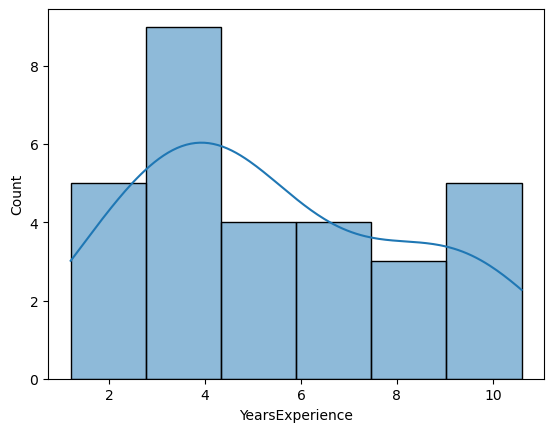

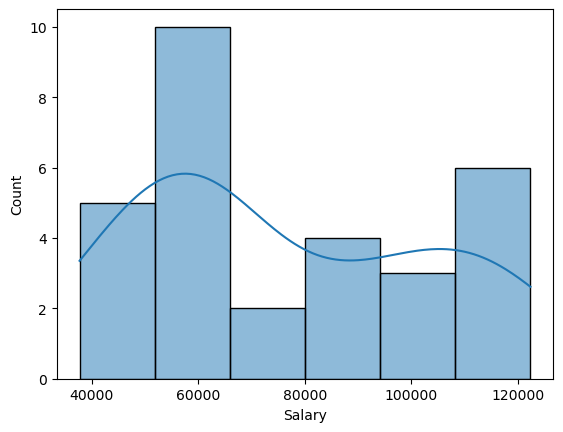

In [10]:
for i in data.columns:
    sns.histplot(x=data[i], kde=True)
    plt.show()

#### <li> <u>Boxplot

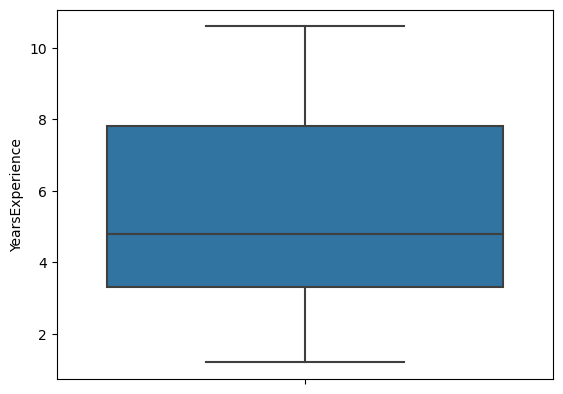

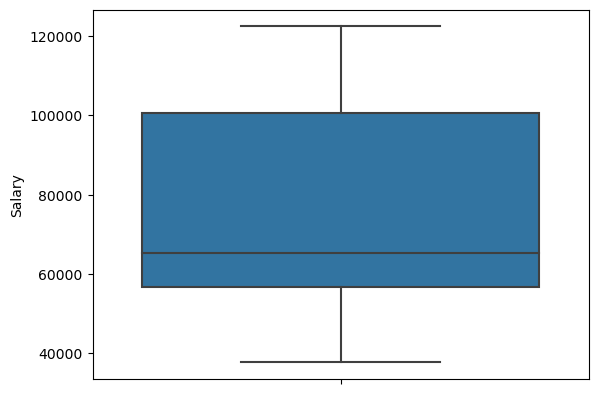

In [11]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

### <u> Multivariate Analysis

#### <li><u> Scatter plot

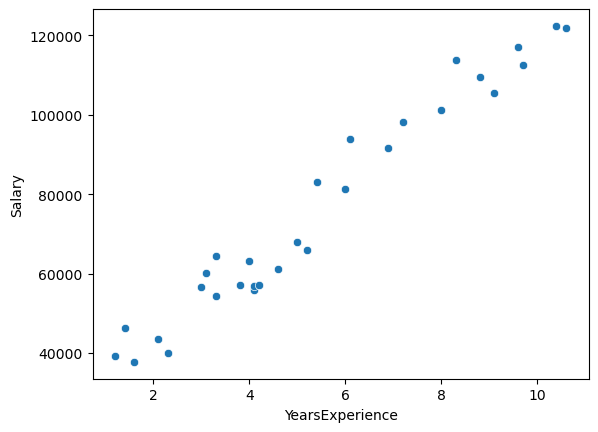

In [12]:
sns.scatterplot(data=data, x='YearsExperience', y='Salary')
plt.show()

#### <li> <u> Heat map

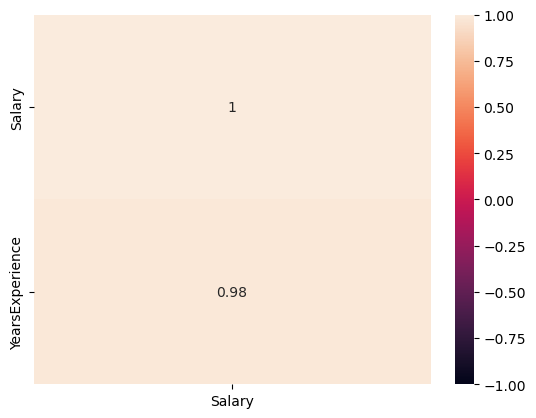

In [13]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

### Selecting Features and Targets

In [14]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [16]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

### <u> Feature Scaling

#### Initialising Standard Scaler

In [17]:
sc = StandardScaler()

In [18]:
x = sc.fit_transform(x)

#### splitting the data into training and testing tests

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
x_test

array([[ 1.5363355 ],
       [-0.1481381 ],
       [ 1.03457741],
       [-0.00477865],
       [-0.75741579],
       [-0.57821647]])

### Model Building

#### Initialising the model 

In [21]:
model = LinearRegression()

#### Fitting the model with the training data

In [22]:
model.fit(x_train, y_train)

LinearRegression()

#### predicting using the test data

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

#### Evaluating the accuracy

In [25]:
r2_score(y_test, y_pred)

0.9024461774180498

#### Testing accuracy

In [26]:
model.score(x_test,y_test)

0.9024461774180498

#### Training accuracy

In [27]:
model.score(x_train, y_train)

0.9645401573418148

### MAE 

In [34]:
mean_absolute_error(y_test, y_pred)

6286.453830757746

### MSE

In [29]:
mean_squared_error(y_test, y_pred)

49830096.85590834

### Root Mean Squared Error

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

7059.043621901506

#### Creating a dataframe with y_test and y_pred

In [31]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL','PREDICTED'])

In [32]:
OUTPUT.head(10)

,ACTUAL,PREDICTED
0,112636.0,115791.210113
1,67939.0,71499.278095
2,113813.0,102597.868661
3,83089.0,75268.804224
4,64446.0,55478.792045
5,57190.0,60190.699707


#### Plotting the result

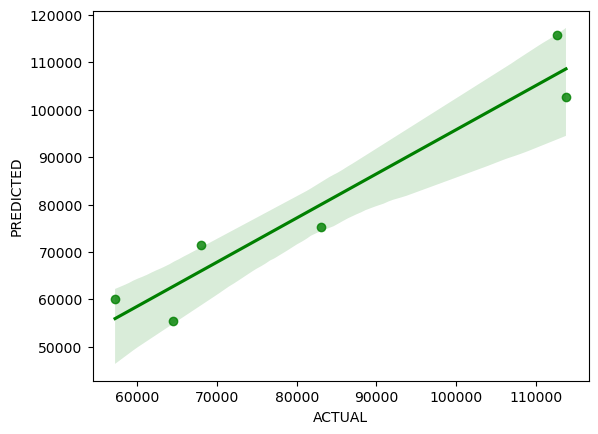

In [36]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTED',color='green')
plt.show()